### Метод опорных векторов (регрессия) [Домашнее задание]

**Примечание:**

> Пожалуйста, не удаляйте комментарии или строки кода.

1. Пожалуйста, реализуйте функцию ```load_data(filename=None)```, которая будет загружать данные файла csv из ```filename``` и возвращать ```DataFrame```.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

def load_data(filename=None):
    #Начало вашего кода
    pd_data = pd.read_csv(filename)
    pd_data.drop("Id", axis = 1, inplace = True)
    return pd_data
    #Конец вашего кода
    #Конец вашего кода

num_data = load_data(filename="num_house_prices.csv")
num_data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1334,20,13175,6,6,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1335,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1336,20,9717,5,6,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


### Ожидаемые результаты:

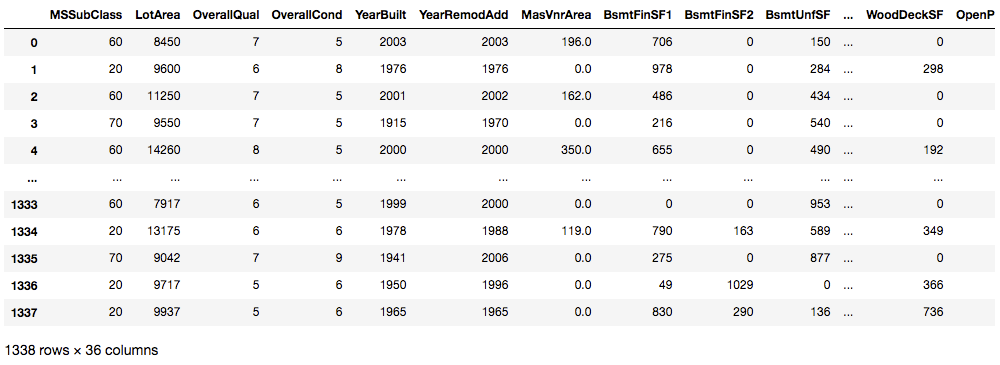

2. Пожалуйста, реализуйте функцию ```split_data(data, ratio=0.1)```, которая разбивает набор данных, загруженный в предыдущем вопросе, на наборы данных ```train``` и ```validation``` в соотношении 9:1.

In [2]:
import numpy as np

def split_data(data, ratio=0.1):
    np.random.seed(1)
    #Начало вашего кода    
    val = ratio
    train = 1 - val
    
    indices = np.arange(0, len(data))
    np.random.shuffle(indices)
    
    val_indices = indices[:round(val * len(data))]
    train_indices = indices[round(val * len(data)):]
    
    val_data = data.iloc[val_indices]
    train_data = data.iloc[train_indices]
    #Конец вашего кода
    return {"validation":val_data, "train":train_data}

splitted_data = split_data(num_data, ratio=0.1)

In [3]:
splitted_data["validation"].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
559,20,7943,4,5,1961,1961,192.0,903,0,126,...,64,0,39,0,0,0,0,4,2007,118500
1087,60,8935,7,5,2002,2002,95.0,0,0,831,...,144,68,0,0,0,0,0,7,2009,195000
1020,20,12085,8,5,2007,2007,328.0,1004,0,730,...,0,0,0,0,0,0,0,11,2007,318000
460,60,9803,7,5,2005,2005,0.0,400,0,466,...,0,108,0,0,0,0,0,2,2008,226700
802,20,8892,5,7,1953,1996,0.0,0,0,105,...,196,0,150,0,0,0,0,10,2008,116000


### Ожидаемые результаты:

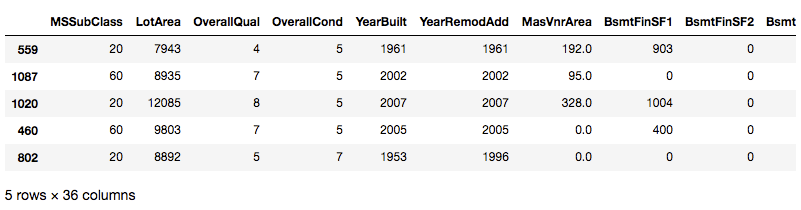

3. Пожалуйста, визуализируйте коэффициенты корреляции для набора данных ```train```.

Примечание: ```figsize=(10,8)```

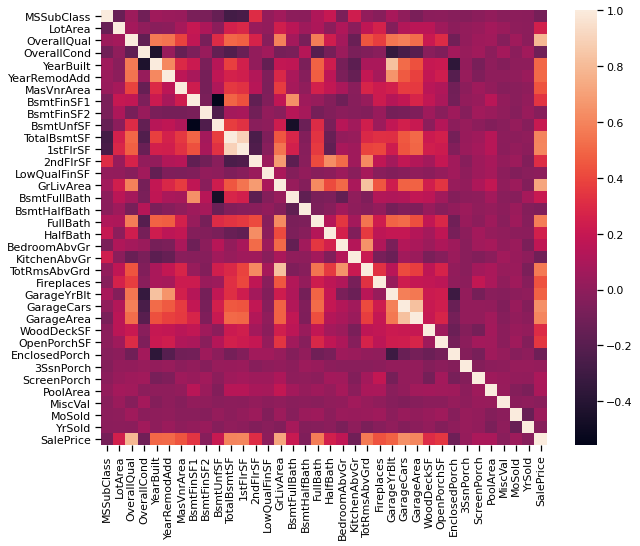

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Начало вашего кода
corr = splitted_data["train"].corr()

plt.figure(figsize=(10,8))
sns.set_context("notebook")
ax = sns.heatmap(corr);

#Конец вашего кода

### Ожидаемые результаты:

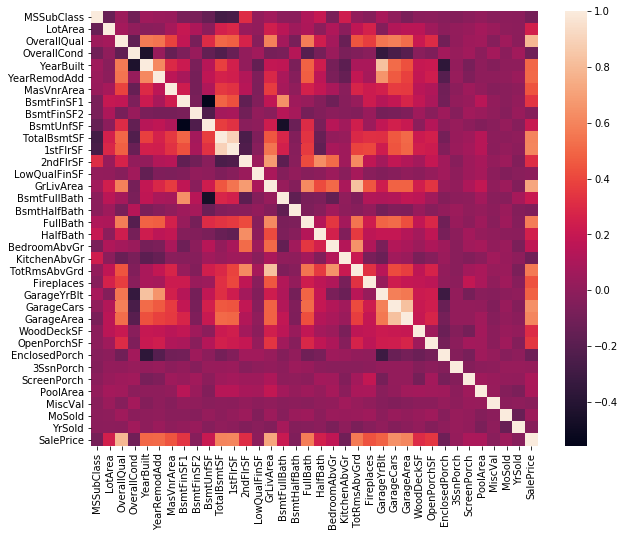

4. Теперь выберите топ 9 наиболее коррелированных параметров с ```"SalePrice"``` и назначьте результаты списку ```important```. Теперь визуализируйте коэффициенты корреляции этих параметров (переменных).

    Примечание: ```figsize=(8,8)```

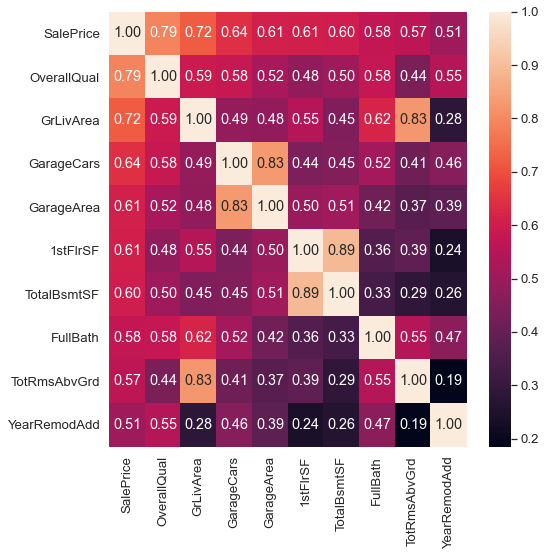

In [5]:
#Начало вашего кода 
corr = splitted_data["train"].corr()
matrix = corr["SalePrice"].abs().sort_values()
important = matrix[-10:].index.tolist()[::-1]

corr = splitted_data["train"][important].corr()

plt.figure(figsize=(8,8))
sns.set(style = "darkgrid")
sns.set_context("notebook")
sns.set(font_scale=1.2)
ax = sns.heatmap(corr, annot = True, fmt = ".2f")
#Конец вашего кода

### Ожидаемые результаты:


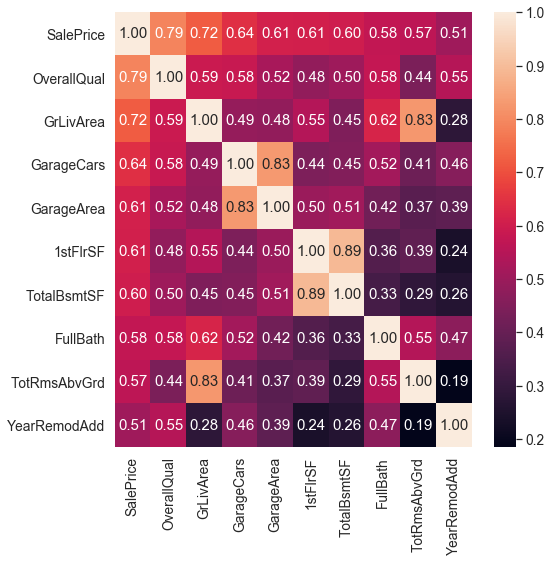

5. Пожалуйста, стандартизируйте столбцы ```"important"``` и ```"SalePrice"``` в наборе обучающих данных ```splitted_data["train"]``` с помощью библиотеки ```sklearn```.

In [6]:
from sklearn.preprocessing import StandardScaler

important = important[1:]

#Начало вашего кода    
sc_x = StandardScaler()
sc_y = StandardScaler()

sc_x.fit(splitted_data["train"][important].values)
sc_y.fit(np.reshape(splitted_data["train"]["SalePrice"].values, (-1,1)))

splitted_data["train"][important] = sc_x.transform(splitted_data["train"][important].values)
splitted_data["train"]["SalePrice"]=sc_y.transform(np.reshape(splitted_data["train"]["SalePrice"].values, (-1,1)))

#Конец вашего кода

print(sc_x)
print(sc_y)

splitted_data["train"][important].head()

StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)


,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearRemodAdd
355,2.851966,1.550877,1.774787,1.815790,1.474137,1.452740,0.785316,1.566762,1.088726
1316,-0.173379,0.001533,0.200105,-0.220751,0.939694,0.550373,-1.057804,0.290023,0.940397
133,-0.929716,-1.288613,-1.374577,-1.716336,-0.786165,-0.951088,-1.057804,-0.986716,0.347085
181,-0.173379,-0.501273,0.200105,-0.162413,0.267079,0.244612,0.785316,-0.348346,-0.443999
1133,1.339293,-0.101757,0.200105,-0.167716,0.801521,0.940653,0.785316,-0.348346,0.989840


### Ожидаемые результаты:

```python
StandardScaler()
StandardScaler()
```

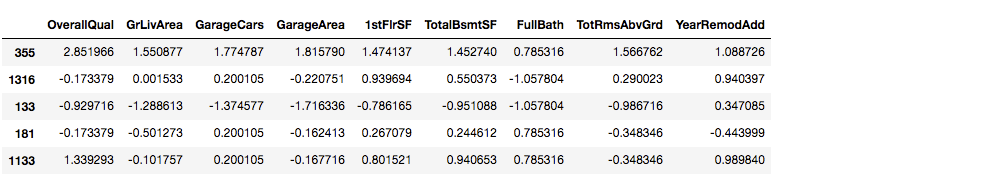

In [7]:
splitted_data["train"]["SalePrice"].head()

355     3.066484
1316   -0.173669
133    -1.060854
181    -0.205813
1133    1.007958
Name: SalePrice, dtype: float64

### Ожидаемые результаты:

```python
355     3.066484
1316   -0.173669
133    -1.060854
181    -0.205813
1133    1.007958
Name: SalePrice, dtype: float64
```

6. Реализуйте функцию ```support_vector_regression(data, parameters, target, epsilon=0.1)```, которая будет обучать метод опорных векторов с использованием уже стандартизированных ```parameters``` и ```target``` в ```data```. Функция должна возвращать словарь с обученным регрессором, списком ```parameters```.

In [8]:
from sklearn.svm import SVR

#Начало вашего кода
def support_vector_regression(data, parameters, target, epsilon = 0.1):
    reg_dict = {}
    
    regressor = SVR(kernel = "linear", epsilon = epsilon)
    regressor.fit(data[parameters].values, data[target].values)
    
    reg_dict["regressor"] = regressor
    reg_dict["parameters"] = parameters
    
    return reg_dict
    
#Конец вашего кода

model = support_vector_regression(splitted_data["train"],important,"SalePrice",epsilon=0.1)
print(model)

{'regressor': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False), 'parameters': ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd']}


### Ожидаемые результаты:

```python
{'regressor': SVR(kernel='linear'), 'parameters': Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF',
       'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd'],
      dtype='object')}
```

7. Пожалуйста, реализуйте функцию ```validation(regressor, data, scaler, target="SalePrice")```, которая будет принимать словарь ```model```, данные ```validation``` и параметр ```target```, который должен быть предсказан. Функция должна возвращать DataFrame с первым столбцом, который будет истинным "SalePrice", а второй столбец предсказан методом опорных векторов и rmse.

In [9]:
#Начало вашего кода
def validation(model, data, scaler_x = sc_x, scaler_y=sc_y, target = "SalePrice"):    
    pd_val = pd.DataFrame(data, columns = [target])
    if pd_val[target].mean() < 1:
        pd_val[target] = scaler_y.inverse_transform(pd_val[target]).astype(int)
    
    col_pred = ""
    for i in model["parameters"]:
        col_pred = col_pred + f"{i}-"
    col_pred = col_pred[:-1]
    
    svr_features = data[model["parameters"]].values
    if svr_features.mean() > 10:
        svr_features = scaler_x.transform(data[model["parameters"]].values)
    
    
    pd_val[col_pred] = scaler_y.inverse_transform(model["regressor"].predict(svr_features)).astype(int)
    rmse = (np.mean((pd_val[target]-pd_val[col_pred])**2)**(1/2))
    return pd_val, rmse
#Конец вашего кода

8. Спрогнозируйте ```"SalePrice"``` для набора данных ```train``` с использованием метода опорных векторов (регрессии). Кроме того, выполните визуализацию прогнозируемого и истинного ```"SalePrice"```. 

**Примечание:** figsize=(8,8)

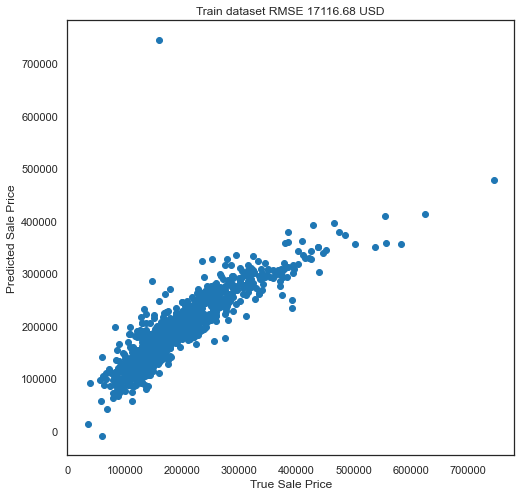

In [11]:
#Начало вашего кода
fig = plt.figure(figsize = (8,8))

pd_predictions_train, rmse_train = validation(model, splitted_data["train"], target="SalePrice")

sns.set(style = "white", context = "notebook")

plt.scatter(pd_predictions_train.iloc[:,0],pd_predictions_train.iloc[:,1],
           color = "tab:blue")
plt.title(f"Train dataset RMSE {rmse_train:.2f} USD")
plt.xlabel("True Sale Price")
plt.ylabel("Predicted Sale Price");

#Конец вашего кода

### Ожидаемые результаты:

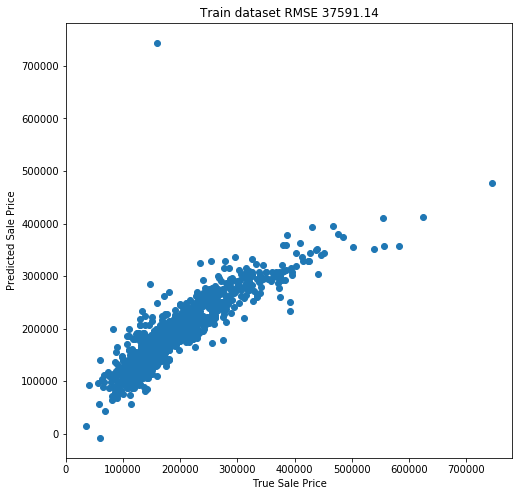

9. Спрогнозируйте ```"SalePrice"``` для набора данных ```validation``` с использованием метода опорных векторов (регрессии). Кроме того, выполните визуализацию прогнозируемого и истинного ```"SalePrice"```. 

**Примечание:** figsize=(8,8)

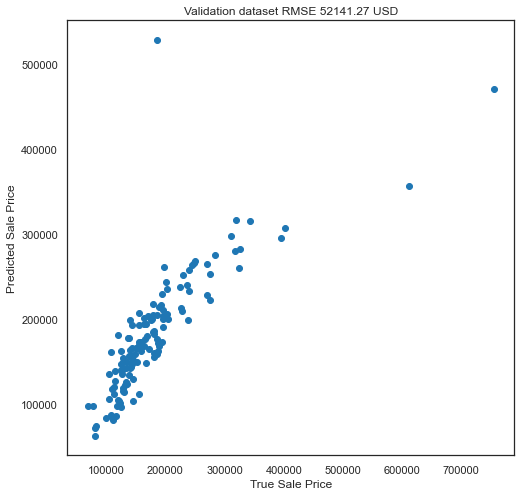

In [12]:
#Начало вашего кода

fig = plt.figure(figsize = (8,8))

pd_predictions_val, rmse_val = validation(model, splitted_data["validation"], target="SalePrice")

sns.set(style = "white", context = "notebook")

plt.scatter(pd_predictions_val.iloc[:,0],pd_predictions_val.iloc[:,1],
           color = "tab:blue")
plt.title(f"Validation dataset RMSE {rmse_val:.2f} USD")
plt.xlabel("True Sale Price")
plt.ylabel("Predicted Sale Price");
#Конец вашего кода

### Ожидаемые результаты:

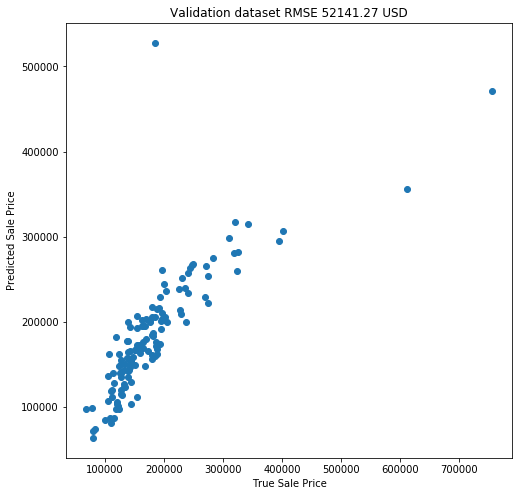

В целом, значения соответствуют прямой линии, что говорит об их близости. Однако существуют точки, которые очень сильно выбивается из общей картины и, скорее всего, влияют на значение RMSE. Попробуем их идентифицировать.

Для того, чтобы выделить эти значения, можно опираться на значения RMSE.

Old size of train dataset - 1204, new size  - 1090


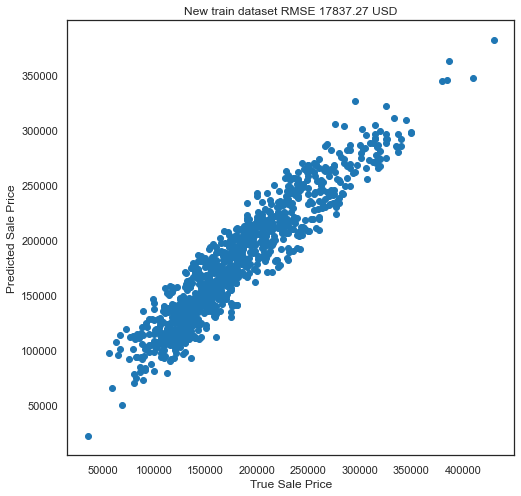

In [13]:
pd_predictions_train["RMSE"] = pd_predictions_train["SalePrice"] - pd_predictions_train.iloc[:,1]
new_indices_train = pd_predictions_train[pd_predictions_train["RMSE"].abs() < 50000].index.tolist()

splitted_data["train"] = splitted_data["train"].loc[new_indices_train]
old_size = len(pd_predictions_train)
new_size = len(splitted_data["train"])

print(f"Old size of train dataset - {old_size}, new size  - {new_size}")

fig = plt.figure(figsize = (8,8))

model = support_vector_regression(splitted_data["train"],important,"SalePrice",epsilon=0.1)
pd_predictions_train_new, rmse_train_new = validation(model, splitted_data["train"], target="SalePrice")

sns.set(style = "white", context = "notebook")

plt.scatter(pd_predictions_train_new.iloc[:,0],pd_predictions_train_new.iloc[:,1],
           color = "tab:blue")
plt.title(f"New train dataset RMSE {rmse_train_new:.2f} USD")
plt.xlabel("True Sale Price")
plt.ylabel("Predicted Sale Price");

Назначив новые индексы для splitted_data["train"] с помощью фильтра квадратичной ошибки менбше 50000, удалось получить новое значение среднеквадратичной ошибки в 17837, что больше чем в два раза меньше. Количество удаленных точек - 114, что несущественно.

Проделаем те же операции для validation dataset.

Old size of validation dataset - 134, new size  - 121


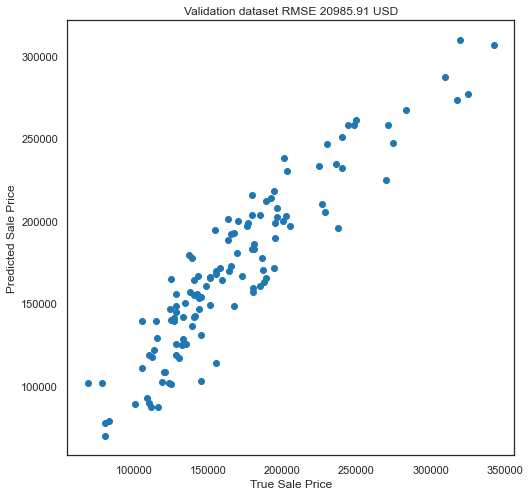

In [14]:
pd_predictions_val["RMSE"] = pd_predictions_val["SalePrice"] - pd_predictions_val.iloc[:,1]
new_indices_val = pd_predictions_val[pd_predictions_val["RMSE"].abs() < 50000].index.tolist()

splitted_data["validation"] = splitted_data["validation"].loc[new_indices_val]
old_size = len(pd_predictions_val)
new_size = len(splitted_data["validation"])

print(f"Old size of validation dataset - {old_size}, new size  - {new_size}")

fig = plt.figure(figsize = (8,8))

pd_predictions_val_new, rmse_val_new = validation(model, splitted_data["validation"], target="SalePrice")

sns.set(style = "white", context = "notebook")

plt.scatter(pd_predictions_val_new.iloc[:,0],pd_predictions_val_new.iloc[:,1],
           color = "tab:blue")
plt.title(f"Validation dataset RMSE {rmse_val_new:.2f} USD")
plt.xlabel("True Sale Price")
plt.ylabel("Predicted Sale Price");

Назначив новые индексы для splitted_data["validation"] с помощью фильтра квадратичной ошибки менбше 50000, удалось получить новое значение среднеквадратичной ошибки в 20986, что больше чем в два раза меньше. Количество удаленных точек - 13, что несущественно.

10. Теперь попробуйте разные значения ```"epsilon"``` во время обучения регрессора, основанного на методе опорных векторов, и визуализируйте поведение ошибки rmse.

Minimum RMSE of 20768.94 has been achieved at 0.23-epsiloned SVR model.


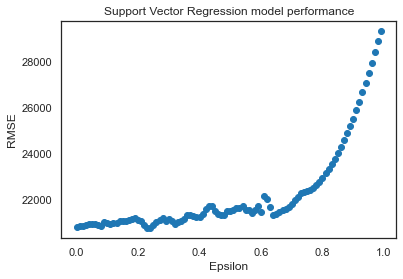

In [15]:
#Начало вашего кода
svr_dict = {}


for eps in np.arange(0,1,0.01):
    models = support_vector_regression(splitted_data["train"],important,"SalePrice",epsilon=eps)
    pd_predictions_vals, rmse_vals = validation(models, splitted_data["validation"], target="SalePrice") 
    svr_dict[eps] = rmse_vals

key_list = list(svr_dict.keys())
val_list = list(svr_dict.values())
val_minimum = min(val_list)
key_minimum = key_list[val_list.index(val_minimum)]
print(f"Minimum RMSE of {val_minimum:.2f} has been achieved at {key_minimum}-epsiloned SVR model.")
plt.scatter(svr_dict.keys(),svr_dict.values(),
           color = "tab:blue")
plt.title("Support Vector Regression model performance")
plt.xlabel("Epsilon")
plt.ylabel("RMSE");

11. Теперь проверьте различные комбинации параметров, используемых для обучения регрессора, основанного на методе опорных векторов?

In [17]:
#Начало вашего кода
splitted_data = split_data(num_data, ratio=0.1)
corr = splitted_data["train"].corr()
matrix = corr["SalePrice"].abs().sort_values()
important_add = matrix[-10:].index.tolist()[::-1]
corr = splitted_data["train"][important_add].corr()
from_correlations = {}
most_correlated = corr["SalePrice"][(corr["SalePrice"]<1) & (corr["SalePrice"]>0.6)].index.tolist()
for i in most_correlated:
    from_correlations[i] = corr[i][corr[i] < 0.45].index.tolist()

important_add = important_add[1:]

#Конец вашего кода

In [18]:
#Начало вашего кода
from IPython.display import display   

models = {}
rmses={}

for key,value in from_correlations.items():
    splitted_data = split_data(num_data, ratio=0.1)
    splitted_data["validation"] = splitted_data["validation"].loc[new_indices_val]
    splitted_data["train"] = splitted_data["train"].loc[new_indices_train]
    important_add = [key] + [i for i in value]
    
    
    sc_x_add = StandardScaler()
    sc_y_add = StandardScaler()
    
    splitted_data["train"] = pd.DataFrame(splitted_data["train"], columns = important_add+["SalePrice"])
    splitted_data["validation"] = pd.DataFrame(splitted_data["validation"], columns = important_add+["SalePrice"])


    sc_x_add.fit(splitted_data["train"][important_add].values)
    sc_y_add.fit(np.reshape(splitted_data["train"]["SalePrice"].values, (-1,1)))

    splitted_data["train"][important_add] = sc_x_add.transform(splitted_data["train"][important_add].values)
    splitted_data["train"]["SalePrice"]=sc_y_add.transform(np.reshape(splitted_data["train"]["SalePrice"].values, (-1,1)))
    
    
    model_add = support_vector_regression(splitted_data["train"],important_add,target="SalePrice",epsilon=0.23)
    pd_predictions_val_add, rmse_val_add = validation(model_add, splitted_data["validation"],\
                                                      scaler_x = sc_x_add,scaler_y=sc_y_add, target="SalePrice") 
    
    #display(pd_predictions_val_add)
    
    models['-'.join(important_add)] = pd_predictions_val_add
    rmses['-'.join(important_add)] = rmse_val_add
    


 
for i,j in zip(models, rmses):
    print(rmses[j])
    display(models[i])
#Конец вашего кода

346761.5133473944


,SalePrice,OverallQual-TotRmsAbvGrd
559,118500,412873
1087,195000,561910
1020,318000,600908
460,226700,561910
802,116000,451871
...,...,...
120,150750,483915
759,189000,545888
248,139000,506891
991,187500,506891


27193.96667940024


,SalePrice,GrLivArea-TotalBsmtSF-YearRemodAdd
559,118500,122795
1087,195000,191440
1020,318000,253855
460,226700,203864
802,116000,89297
...,...,...
120,150750,180756
759,189000,210598
248,139000,201637
991,187500,166431


33705.313829039624


,SalePrice,GarageCars-1stFlrSF-TotRmsAbvGrd
559,118500,121287
1087,195000,176519
1020,318000,262440
460,226700,178317
802,116000,154727
...,...,...
120,150750,201989
759,189000,194559
248,139000,165175
991,187500,156406


31154.66826924887


,SalePrice,GarageArea-FullBath-TotRmsAbvGrd-YearRemodAdd
559,118500,104127
1087,195000,204711
1020,318000,255310
460,226700,218678
802,116000,144367
...,...,...
120,150750,197967
759,189000,194351
248,139000,165056
991,187500,178165


29201.98814654139


,SalePrice,1stFlrSF-GarageCars-FullBath-TotRmsAbvGrd-YearRemodAdd
559,118500,112064
1087,195000,189664
1020,318000,261942
460,226700,193463
802,116000,149930
...,...,...
120,150750,197455
759,189000,210029
248,139000,190648
991,187500,167564


27013.012246167036


,SalePrice,TotalBsmtSF-GrLivArea-FullBath-TotRmsAbvGrd-YearRemodAdd
559,118500,122609
1087,195000,193143
1020,318000,253101
460,226700,205268
802,116000,88578
...,...,...
120,150750,174468
759,189000,212389
248,139000,204925
991,187500,170367


In [27]:
#Начало вашего кода
print(f"9 important parameters 0.23-epsiloned SVR model RMSE: {val_minimum:55.2f}\n")

for i in rmses:
    print(f"{i:56} parameters 0.23-epsiloned SVR model RMSE: {rmses[i]:10.2f}")
#Конец вашего кода

9 important parameters 0.23-epsiloned SVR model RMSE:                                                20768.94

OverallQual-TotRmsAbvGrd                                 parameters 0.23-epsiloned SVR model RMSE:  346761.51
GrLivArea-TotalBsmtSF-YearRemodAdd                       parameters 0.23-epsiloned SVR model RMSE:   27193.97
GarageCars-1stFlrSF-TotRmsAbvGrd                         parameters 0.23-epsiloned SVR model RMSE:   33705.31
GarageArea-FullBath-TotRmsAbvGrd-YearRemodAdd            parameters 0.23-epsiloned SVR model RMSE:   31154.67
1stFlrSF-GarageCars-FullBath-TotRmsAbvGrd-YearRemodAdd   parameters 0.23-epsiloned SVR model RMSE:   29201.99
TotalBsmtSF-GrLivArea-FullBath-TotRmsAbvGrd-YearRemodAdd parameters 0.23-epsiloned SVR model RMSE:   27013.01


Были выбраны самые коррелирующие с SalePrice признаки, а затем наименее коррелирующие признаки с данными признаками.  
Можно заметить, что с повышением количества параметров, результаты стабильно уменьшаются.  
Важно отметить, что параметры (их количество и корреляция) для модели Метода Опорных Векторов выходят более важными, чем значение эпсилона. В предыдущем задании заметно, что несмотря на различные значения эпсилона, значение RMSE оставалось в коридоре от 20000 до 30000, тогда как ошибка с двумя параметрами становится аномально большой и может достигать 346761.51.

Благодаря удалению outliers, значения ошибки уменьшились с 50000 до 20000, что очень значительно. Благодаря этому, из всех методов регрессии, Метод Опорных Векторов продемонстрировал лучший результат на данный момент.  
Вероятно, в случае игнорирования outliers и другими методами, и их результаты были бы намного лучше.  
Если outliers не игнорировать, то SVR показал сравнимые с другими методами результат, где RMSE ~ 50000.

### Отличная работа